In [1]:
import ephem
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [13]:

# Define the observer's location (San Francisco)
observer = ephem.Observer()
observer.lat, observer.lon = '37.7749', '-122.4194'  # San Francisco latitude and longitude
observer.elevation = 0  # Optional, add elevation in meters

# Define the start and end dates
start_date = datetime(2023, 6, 21, 15, 00)  # June 21, 2023, at 3 pm
end_date = datetime(2024, 6, 20, 21, 00)    # June 20, 2024, at 10 pm

# Iterate through the date range in 30-minute intervals
current_date = start_date
data = []

while current_date <= end_date:
    observer.date = current_date
    moon_phase = ephem.Moon(observer).phase  # Moon phase (percentage illuminated)
    
    # Normalize the moon phase to the range (0.0, 1.0)
    normalized_phase = moon_phase / 100.0  # Moon phase is 0-100%; divide by 100 to normalize
    
    # Append data as a dictionary
    data.append({
        'datetime': current_date,
        'moon_phase': moon_phase,
        'normalized_phase': normalized_phase
    })
    
    current_date += timedelta(minutes=30)  # Increment by 30 minutes

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

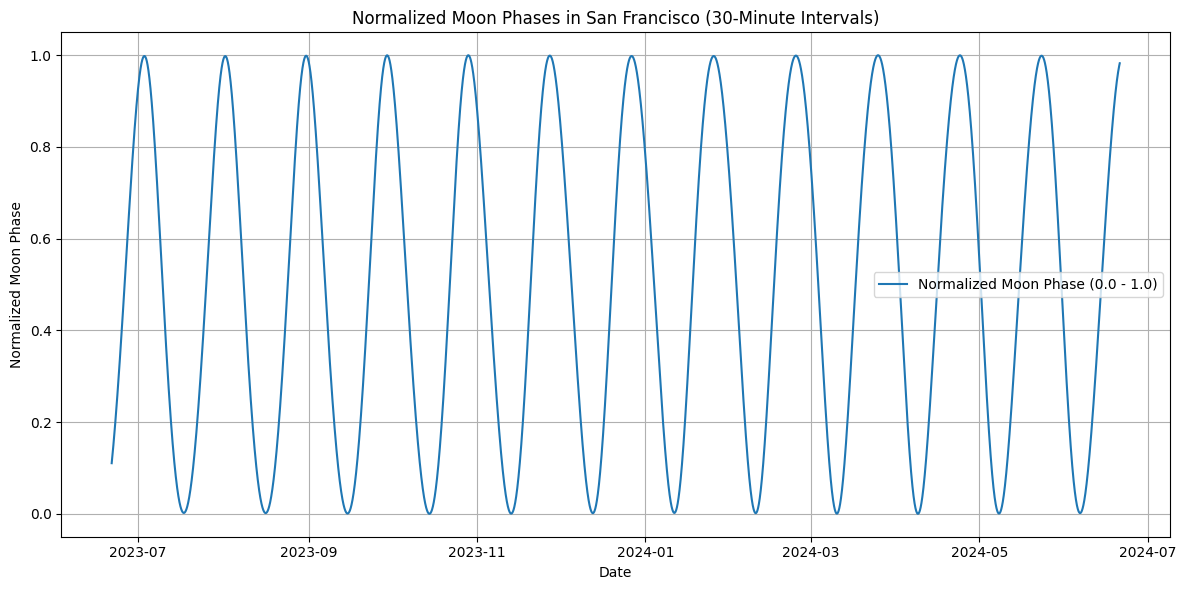

In [14]:
# Plot the normalized moon phases
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['normalized_phase'], label='Normalized Moon Phase (0.0 - 1.0)')
plt.xlabel('Date')
plt.ylabel('Normalized Moon Phase')
plt.title('Normalized Moon Phases in San Francisco (30-Minute Intervals)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
df.shape

(17533, 3)

In [16]:
df.to_csv("../data/moon.csv", index = True)